In [2]:
import functions as fun

Defaulting to user installation because normal site-packages is not writeable


In [3]:
from dotenv import load_dotenv

import os

load_dotenv()
FOLDER = os.environ.get("FOLDER")

In [4]:
exp_files = fun.list_files_in_directory(dir_path=FOLDER+"/exp_output/")

In [5]:
import pandas as pd
out_df = pd.DataFrame([])

for jj in range(0, len(exp_files)):
    df = pd.read_csv(FOLDER+"/exp_output/"+exp_files[jj])
    df = df[df['Response'].isna() == False]
    print('   ', jj, exp_files[jj], df.shape)
    out_df = pd.concat([out_df, df])
    out_df = out_df.drop_duplicates()
    print(out_df.shape)

# out_df = out_df[out_df['Retrieval_Type'] == 'Chunk']
out_df['Top_K'] = out_df['Top_K'].astype(str)
out_df['Retrieval_Type'] = out_df['Retrieval_Type'].astype(str)

print(out_df.shape)
out_df = out_df.reset_index(drop=True)
out_df.dtypes

    0 5_exp_pipeline_Claude35_Neighbor_25.csv (111, 13)
(111, 13)
    1 5_exp_pipeline_Claude35_Chunk_50.csv (111, 13)
(222, 13)
    2 5_exp_pipeline_Claude35_Chunk_20.csv (111, 13)
(333, 13)
    3 5_exp_pipeline_Claude35_Chunk_8.csv (111, 13)
(444, 13)
    4 5_exp_pipeline_Claude35_Neighbor_50.csv (111, 13)
(555, 13)
    5 5_exp_pipeline_Claude35_Chunk_9.csv (111, 13)
(666, 13)
    6 5_exp_pipeline_Claude35_Document_5.csv (2, 13)
(668, 13)
    7 5_exp_pipeline_Claude35_Document_4.csv (111, 13)
(779, 13)
    8 5_exp_pipeline_Claude35_Document_1.csv (111, 13)
(890, 13)
    9 5_exp_pipeline_Claude35_Chunk_25.csv (111, 13)
(1001, 13)
    10 5_exp_pipeline_Claude35_Document_3.csv (111, 13)
(1112, 13)
    11 5_exp_pipeline_Claude35_Document_2.csv (111, 13)
(1223, 13)
    12 5_exp_pipeline_Claude35_Chunk_15.csv (111, 13)
(1334, 13)
    13 5_exp_pipeline_Claude35_Chunk_3.csv (111, 13)
(1445, 13)
    14 5_exp_pipeline_Claude35_Neighbor_3.csv (111, 13)
(1556, 13)
    15 5_exp_pipeline_Claude35_

section           object
title             object
file_name         object
document_type     object
page               int64
total_pages        int64
context           object
question          object
golden_answer     object
model             object
Retrieval_Type    object
Top_K             object
Response          object
dtype: object

In [6]:

out_df['Retrieval_Type'].value_counts()


Retrieval_Type
Chunk       1443
Neighbor     666
Document     446
Name: count, dtype: int64

In [7]:
out_df['Top_K'].value_counts()

Top_K
3     333
25    222
50    222
4     222
7     222
12    222
5     113
20    111
8     111
9     111
1     111
2     111
15    111
13    111
10    111
11    111
Name: count, dtype: int64

In [8]:
# temp_out_df = out_df[out_df['Top_K'] == '12']
# temp_out_df.reset_index(inplace=True)
# temp_out_df['Response'].loc[100]

In [9]:
out_df['question'] = out_df['question'].str.replace('\n', '')
out_df['Response'] = out_df['Response'].str.replace('\n', '')
out_df['context'] = out_df['context'].str.replace('\n', '')

out_df['similarity_score'] = 0.0
out_df['BLEU'] = 0.0
out_df['Cosine'] = 0.0
out_df['topk_ret'] = ''

out_df = out_df[['section', 'title', 'file_name', 'document_type', 'page', 'total_pages', 'context', 'question', 'golden_answer', 
         'model', 'Retrieval_Type', 'Top_K', 'topk_ret', 'Response', 'similarity_score', 'BLEU', 'Cosine']]


#################################
for i in range(0, len(out_df['question'])):
    user_input = out_df['question'].iloc[i]
    response = out_df['Response'].iloc[i]
    golden_answer = out_df['golden_answer'].iloc[i]
    Retrieval_Type = out_df['Retrieval_Type'].iloc[i]
    Top_K = out_df['Top_K'].iloc[i]

    similarity_score = fun.calculate_fuzzy_similarity(response, golden_answer)
    out_df.loc[i, 'similarity_score'] = similarity_score
    # print(f"Fuzzy Similarity Score: {similarity_score}")

    tfidf_similarity = fun.calculate_tfidf_cosine_similarity(response, golden_answer)
    out_df.loc[i, 'Cosine'] = tfidf_similarity
    # print(f"TF-IDF Cosine Similarity: {tfidf_similarity:.2f}")

    bleu_score = fun.calculate_bleu_score(response, golden_answer)
    out_df.loc[i, 'BLEU'] = bleu_score
    # print(f"BLEU Score: {bleu_score:.2f}")

    out_df.loc[i, 'topk_ret'] = str(Retrieval_Type) + str(Top_K)


In [10]:
out_df[['similarity_score', 'BLEU', 'Cosine']].head(1)
## golden to response
##15.0	0.097433	0.750351

##  context to golden_answer
##17.0	0.068107	0.664086

## context to response
## 3.0	0.085294	0.684223

,similarity_score,BLEU,Cosine
0,56.0,0.097433,0.750351


In [11]:
pd.set_option('display.max_colwidth', None)
out_df = out_df[(out_df['topk_ret'] != 'Document5')]

out_df[['context', 'question', 'golden_answer', 'Response', 'similarity_score']][out_df['question'] == ' What are the limitations of the correlation matrix in visualizing the relationships between procedures, and how does the correlation network address these limitations?'].head(2)

,context,question,golden_answer,Response,similarity_score
0,"['Fig. 4. A Euclidian single cluster dendrogram on the NPP procedures , where the numbers at the bottom are NPP procedur es in the codex. The numbers at the bottom of Fig. 4 are the identification number s associated with the procedures in the codex. A hierarchical cluster analysis is applied to the dissimilarity matrix for n clusters , where n is defined subjectively by the expert. Based on data configuration , the number of clusters selected is seven , corresponding the number of GOMS that are being investigated . This is then examined against the GOMS groups, which resulted in 11 accuracy. As such , further methods were considered for defining the GOMS type. Correlation Network . When investigating the dependence between multiple variables, a correlation matrix can be constructed. In this case , the correlation between procedures is being evaluated. The result is a matrix containing the correlation coefficient s between each of the procedures . While a matrix contains a lot of information, visualization of that data can be difficult and chaotic. Thus , a network was constructed to better visualize the correlation relationships between the stem words , as in Fig. 5. The thickness of the lines between the stem word nodes denotes the strength of the correlation. In addition to line thickness, the colo rs of the lines indicate if the correlation is positive black or negative grey . Oddly enough , there are no strong negative correlations, or thick grey lines , whereas there is a strong positive relationship between clump s of procedures . These clumps m ay lend themselves to mapping to the GOMS primitives however , there only appear to be 4 or 5 clumps at most, while seven GOMS primitives are defined in the codex . As such , another method to define the GOMS primitives was explored .']","What are the limitations of the correlation matrix in visualizing the relationships between procedures, and how does the correlation network address these limitations?","The text states that while a correlation matrix contains a lot of information, visualizing it can be difficult and chaotic. This is likely because the matrix represents a complex network of relationships, making it difficult to identify patterns or trends. The correlation network addresses these limitations by providing a more intuitive visual representation. The thickness of the lines represents the strength of the correlation, and the colors indicate whether the correlation is positive or negative, making it easier to understand the relationships between procedures. This allows for a more effective visualization of the data and helps to identify potential groupings of procedures.","The correlation matrix and correlation network are two ways of visualizing the relationships between procedures, but the correlation network addresses some key limitations of the correlation matrix:1. The correlation matrix contains a lot of information, but visualizing that data can be difficult and chaotic. The correlation network provides a clearer visual representation of the relationships.2. In the correlation network, the thickness of the lines between nodes denotes the strength of the correlation. This allows for easier interpretation of correlation strength compared to a matrix of numbers.3. The network uses colors to indicate positive (black) vs negative (grey) correlations, which is not easily shown in a standard correlation matrix.4. The network layout allows for easier identification of clusters or ""clumps"" of highly correlated procedures. These clumps are harder to detect in a matrix format.5. The network can more clearly show which procedures are uncorrelated, as they will have few or no connections to other nodes. 6. Complex relationships between multiple procedures are easier to trace visually in the network compared to cross-referencing numbers in a matrix.7. The matrix becomes unwieldy for large numbers of procedures, 

In [12]:
out_df.columns

Index(['section', 'title', 'file_name', 'document_type', 'page', 'total_pages',
       'context', 'question', 'golden_answer', 'model', 'Retrieval_Type',
       'Top_K', 'topk_ret', 'Response', 'similarity_score', 'BLEU', 'Cosine'],
      dtype='object')

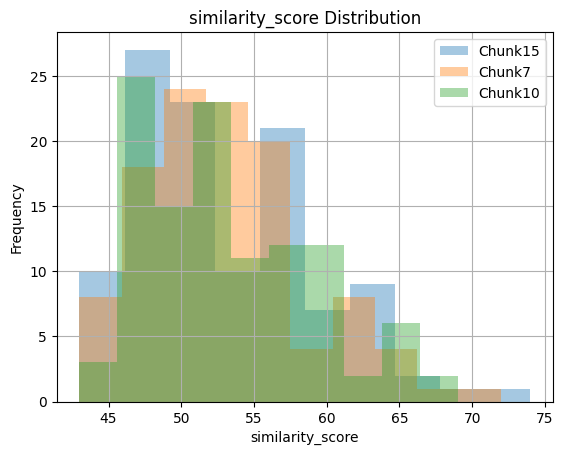

In [13]:
import matplotlib.pyplot as plt
# Group by 'Profession' and plot histogram of 'Age'
temp_out_df = out_df[(out_df['topk_ret'] == 'Chunk10')| (out_df['topk_ret'] == 'Chunk15')| (out_df['topk_ret'] == 'Chunk7')]
temp_out_df.groupby(['topk_ret'])['similarity_score'].hist(alpha=0.4)

# Add legend and labels
plt.legend(temp_out_df['topk_ret'].unique())
plt.xlabel('similarity_score')
plt.ylabel('Frequency')
plt.title('similarity_score Distribution')

# Show the plot
plt.show()

In [14]:
means_df = pd.DataFrame(out_df.groupby(['topk_ret'])['similarity_score'].mean())
means_df.reset_index(drop=False, inplace=True)
means_df.sort_values(by=['similarity_score'], ascending=False, inplace=True)
means_df.reset_index(drop=True)

means_df['similarity_score'] = means_df['similarity_score'] /100

means_df.to_csv('6_similarity_score.csv')

In [15]:
means_df = pd.DataFrame(out_df.groupby(['topk_ret'])['Cosine'].mean())
means_df.reset_index(drop=False, inplace=True)
means_df.sort_values(by=['Cosine'], ascending=False)

means_df.to_csv('6_cosine_sim.csv')

In [16]:
means_df = pd.DataFrame(out_df.groupby(['topk_ret'])['BLEU'].mean())
means_df.reset_index(drop=False, inplace=True)
means_df.sort_values(by=['BLEU'], ascending=False)

means_df.to_csv('6_BLEU.csv')

In [20]:
means_df = pd.DataFrame(out_df.groupby(['topk_ret'])[['BLEU', 'Cosine', 'similarity_score']].mean())
means_df['similarity_score'] = means_df['similarity_score'] /100
means_df.to_csv('6_metrics_pub.csv')
means_df

,BLEU,Cosine,similarity_score
topk_ret,,,
Chunk10,0.057849,0.625676,0.532973
Chunk11,0.057718,0.626121,0.528198
Chunk12,0.056433,0.617583,0.527838
Chunk13,0.057182,0.626239,0.526216
Chunk15,0.057153,0.608640,0.528559
Chunk20,0.056936,0.613893,0.527748
Chunk25,0.057521,0.610425,0.526486
Chunk3,0.057827,0.634084,0.529099
Chunk5,0.055870,0.636200,0.527658


In [18]:
## next up: 
## chunk 11, chunk 13, chunk 14, 9
### neighbor 5